In [11]:
import pandas as pd

# Provide the correct file path inside quotes
data = pd.read_csv('/Users/christinaland/Downloads/Project 8.1/Meteorite_Data.csv')

# Check the first few rows to ensure the data loads correctly
print(data.head())


       name   id nametype     recclass      mass  fall    year    reclat  \
0    Aachen    1    Valid           L5      21.0  Fell  1880.0  50.77500   
1    Aarhus    2    Valid           H6     720.0  Fell  1951.0  56.18333   
2      Abee    6    Valid          EH4  107000.0  Fell  1952.0  54.21667   
3  Acapulco   10    Valid  Acapulcoite    1914.0  Fell  1976.0  16.88333   
4   Achiras  370    Valid           L6     780.0  Fell  1902.0 -33.16667   

     reclong           GeoLocation  
0    6.08333     (50.775, 6.08333)  
1   10.23333  (56.18333, 10.23333)  
2 -113.00000    (54.21667, -113.0)  
3  -99.90000     (16.88333, -99.9)  
4  -64.95000   (-33.16667, -64.95)  


/var/folders/ns/cql9l46x5vj01mtl29f5s8zr0000gn/T/ipykernel_82722/71291463.py:31: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_data = data.pivot_table(index='year_group', columns='recclass', aggfunc='size', fill_value=0)


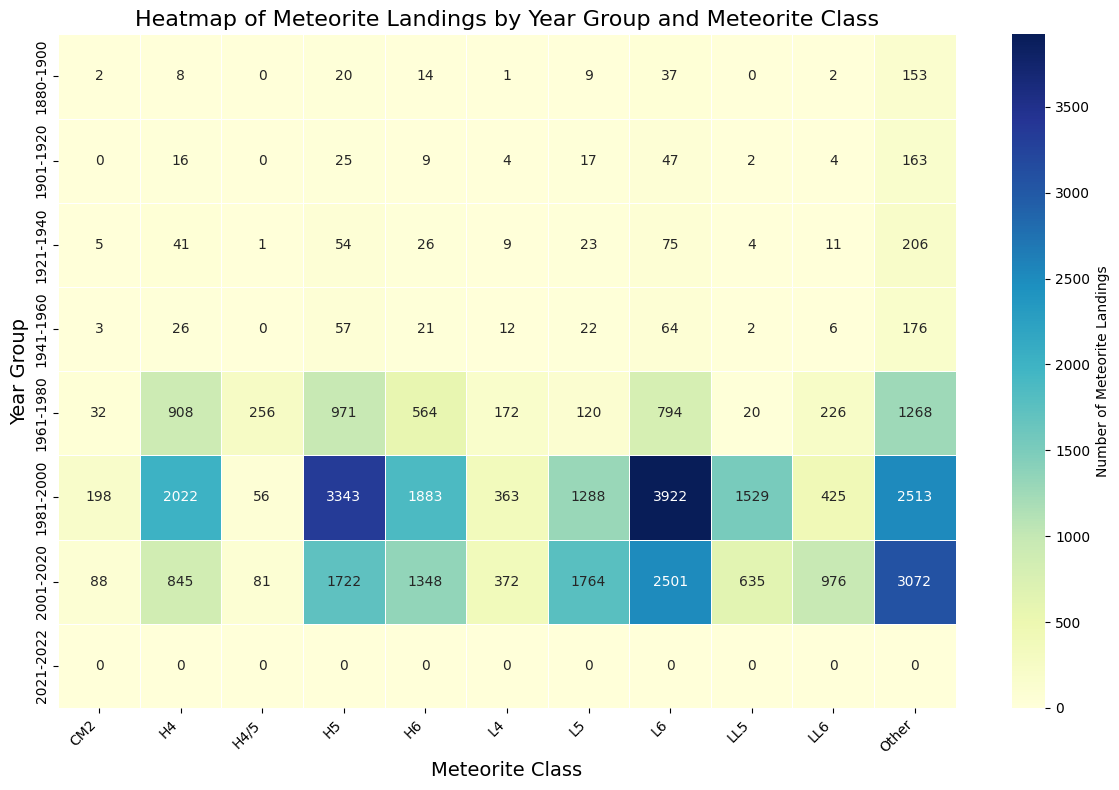

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV data
data = pd.read_csv('/Users/christinaland/Downloads/Project 8.1/Meteorite_Data.csv')

# Strip any leading/trailing whitespace from column names
data.columns = data.columns.str.strip()

# Ensure that 'year' is numeric (in case of errors or missing data)
data['year'] = pd.to_numeric(data['year'], errors='coerce')  # Convert 'year' to numeric, invalid values become NaN

# Drop rows with NaN values in 'year' or 'recclass' columns
data = data.dropna(subset=['year', 'recclass'])

# Create year bins: Group years into smaller intervals
bins = [1880, 1900, 1920, 1940, 1960, 1980, 2000, 2020, 2022]  # Example year ranges
labels = ['1880-1900', '1901-1920', '1921-1940', '1941-1960', '1961-1980', '1981-2000', '2001-2020', '2021-2022']

# Use pd.cut to create year groups (bins)
data['year_group'] = pd.cut(data['year'], bins=bins, labels=labels, right=False)

# Get the top N most frequent meteorite classes
top_classes = data['recclass'].value_counts().head(10).index

# Replace rare classes with 'Other'
data['recclass'] = data['recclass'].apply(lambda x: x if x in top_classes else 'Other')

# Create a pivot table: Count the number of meteorites per year group and recclass (meteorite type)
pivot_data = data.pivot_table(index='year_group', columns='recclass', aggfunc='size', fill_value=0)

# Create the heatmap with better layout
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_data, cmap='YlGnBu', annot=True, fmt='d', linewidths=0.5, cbar_kws={'label': 'Number of Meteorite Landings'})

# Add title and labels
plt.title("Heatmap of Meteorite Landings by Year Group and Meteorite Class", fontsize=16)
plt.xlabel("Meteorite Class", fontsize=14)
plt.ylabel("Year Group", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to avoid clipping of labels
plt.tight_layout()

# Save the plot as an image
plt.savefig('meteorite_landings_heatmap_cleaned.png', format='png', dpi=300)  # Save high resolution image
plt.show()



/var/folders/ns/cql9l46x5vj01mtl29f5s8zr0000gn/T/ipykernel_82722/3960769556.py:32: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_data = data.pivot_table(index='year_group', columns='recclass', aggfunc='size', fill_value=0)


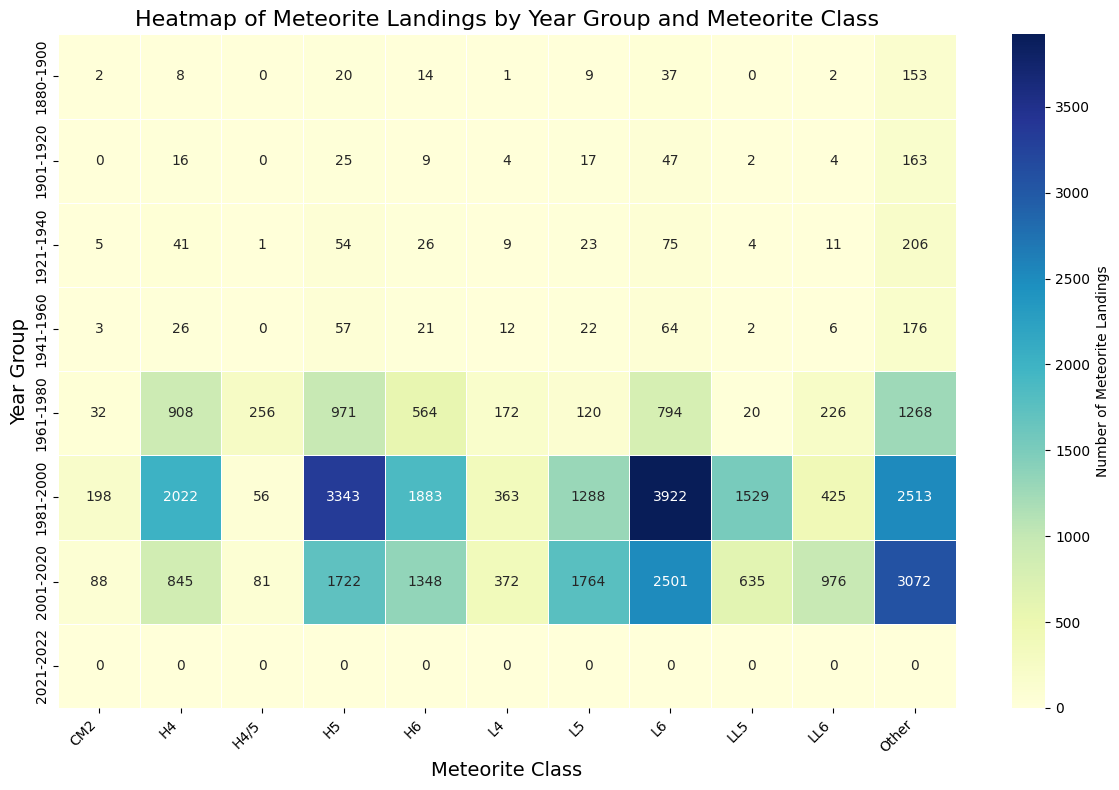

Heatmap saved to: /Users/christinaland/Downloads/Project 8.1/images/meteorite_landings_heatmap_cleaned.png


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Load the CSV data
data = pd.read_csv('/Users/christinaland/Downloads/Project 8.1/Meteorite_Data.csv')

# Strip any leading/trailing whitespace from column names
data.columns = data.columns.str.strip()

# Ensure that 'year' is numeric (in case of errors or missing data)
data['year'] = pd.to_numeric(data['year'], errors='coerce')  # Convert 'year' to numeric, invalid values become NaN

# Drop rows with NaN values in 'year' or 'recclass' columns
data = data.dropna(subset=['year', 'recclass'])

# Create year bins: Group years into smaller intervals
bins = [1880, 1900, 1920, 1940, 1960, 1980, 2000, 2020, 2022]  # Example year ranges
labels = ['1880-1900', '1901-1920', '1921-1940', '1941-1960', '1961-1980', '1981-2000', '2001-2020', '2021-2022']

# Use pd.cut to create year groups (bins)
data['year_group'] = pd.cut(data['year'], bins=bins, labels=labels, right=False)

# Get the top N most frequent meteorite classes
top_classes = data['recclass'].value_counts().head(10).index

# Replace rare classes with 'Other'
data['recclass'] = data['recclass'].apply(lambda x: x if x in top_classes else 'Other')

# Create a pivot table: Count the number of meteorites per year group and recclass (meteorite type)
pivot_data = data.pivot_table(index='year_group', columns='recclass', aggfunc='size', fill_value=0)

# Create the heatmap with better layout
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_data, cmap='YlGnBu', annot=True, fmt='d', linewidths=0.5, cbar_kws={'label': 'Number of Meteorite Landings'})

# Add title and labels
plt.title("Heatmap of Meteorite Landings by Year Group and Meteorite Class", fontsize=16)
plt.xlabel("Meteorite Class", fontsize=14)
plt.ylabel("Year Group", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to avoid clipping of labels
plt.tight_layout()

# Specify the folder and file name where the image will be saved
folder_path = '/Users/christinaland/Downloads/Project 8.1/images'  # Update this to your folder path
if not os.path.exists(folder_path):
    os.makedirs(folder_path)  # Create the folder if it doesn't exist

# Save the plot as an image in the specified folder
file_path = os.path.join(folder_path, 'meteorite_landings_heatmap_cleaned.png')
plt.savefig(file_path, format='png', dpi=300)  # Save high resolution image

# Show the plot
plt.show()

print(f"Heatmap saved to: {file_path}")
